# Lab | Data cleaning and wrangling

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

In [29]:
import scipy.stats as stats
import os
import math

from sklearn.preprocessing import StandardScaler


from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [30]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,"2,763.52",No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.81,Two-Door Car,Medsize
1,QZ44356,Arizona,"6,979.54",No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,"1,131.46",Four-Door Car,Medsize
2,AI49188,Nevada,"12,887.43",No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.47,Two-Door Car,Medsize
3,WW63253,California,"7,645.86",No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.88,SUV,Medsize
4,HB64268,Washington,"2,813.69",No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.13,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,"23,405.99",No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.23,Four-Door Car,Medsize
9130,PK87824,California,"3,096.51",Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.20,Four-Door Car,Medsize
9131,TD14365,California,"8,163.89",No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.78,Four-Door Car,Medsize
9132,UP19263,California,"7,524.44",No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.20,Four-Door Car,Large


In [31]:
data.shape

(9134, 24)

In [32]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [33]:
data.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington                 2,763.52       No     Basic   
1     QZ44356     Arizona                 6,979.54       No  Extended   
2     AI49188      Nevada                12,887.43       No   Premium   
3     WW63253  California                 7,645.86       No     Basic   
4     HB64268  Washington                 2,813.69       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California                23,405.99       No     Basic   
9130  PK87824  California                 3,096.51      Yes  Extended   
9131  TD14365  California                 8,163.89       No  Extended   
9132  UP19263  California                 7,524.44       No  Extended   
9133  Y167826  California                 2,611.84       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

In [34]:
data = data.rename(columns={'Customer' :'Customer ID' ,
                            'EmploymentStatus' : 'Employment_Status'})
data.columns = [column.lower().replace(' ', '_') for column in data.columns]

In [35]:
pd.options.display.float_format = "{:,.2f}".format

In [36]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], 
                                  dayfirst=True).dt.strftime('%m/%d/%Y')

In [37]:
data.head()      

,customer_id,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,"2,763.52",No,Basic,Bachelor,02/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.81,Two-Door Car,Medsize
1,QZ44356,Arizona,"6,979.54",No,Extended,Bachelor,01/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,"1,131.46",Four-Door Car,Medsize
2,AI49188,Nevada,"12,887.43",No,Premium,Bachelor,02/19/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.47,Two-Door Car,Medsize
3,WW63253,California,"7,645.86",No,Basic,Bachelor,01/20/2011,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.88,SUV,Medsize
4,HB64268,Washington,"2,813.69",No,Basic,Bachelor,03/02/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.13,Four-Door Car,Medsize


### 1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

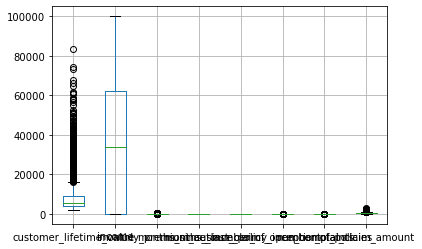

In [38]:
#import pandas as pd

_, bp = pd.DataFrame.boxplot(data, return_type='both')
outliers = [flier.get_ydata() for flier in bp["fliers"]]
out_liers = [i.tolist() for i in outliers]

### 2. Create a copy of the dataframe for the data wrangling.

In [39]:
df2 = data.copy()

### 3. Normalize the continuous variables. You can use any one method you want.

In [40]:
y = df2['total_claim_amount']
X = df2.drop(['total_claim_amount'],axis=1)

In [41]:
numericals = X.select_dtypes(np.number)

In [42]:
transformer = StandardScaler().fit(numericals)
x_standardized = transformer.transform(numericals)

### 4. Encode the categorical variables

In [43]:
categoricals = X.select_dtypes(exclude=np.number)

In [44]:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals)
encoded = encoder.transform(categoricals).toarray()


In [45]:
X = np.concatenate((x_standardized, encoded), axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)


### 5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [52]:
df2['effective_to_date'] = pd.to_datetime(df2['effective_to_date'])

In [53]:
df2.head()  

,customer_id,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,"2,763.52",No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.81,Two-Door Car,Medsize
1,QZ44356,Arizona,"6,979.54",No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,"1,131.46",Four-Door Car,Medsize
2,AI49188,Nevada,"12,887.43",No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.47,Two-Door Car,Medsize
3,WW63253,California,"7,645.86",No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.88,SUV,Medsize
4,HB64268,Washington,"2,813.69",No,Basic,Bachelor,2011-03-02,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.13,Four-Door Car,Medsize


### 6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [49]:
df2.select_dtypes(include=np.number).columns.tolist()

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

In [46]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=4)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [47]:
predictions = model.predict(X_test)
score = model.score(X_test, y_test)

In [48]:
score

0.6193401629891546